<a href="https://colab.research.google.com/github/danielcesar82/kaggle/blob/main/TitanicAwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Titanic 

Importando as Bibliotecas 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando os datasets

In [ ]:
treino_dataset = pd.read_csv('train.csv')
teste_dataset = pd.read_csv('test.csv')

# Análise Exploratória de Dados

##Visualização dos datasets

In [ ]:
treino_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
teste_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Analisando os dados apresentados, os datasets possuem diversas variáveis categóricas (PassengerId, Pclass, Name, Sex, Ticket, Cabin, Embarked) e quantitativas (Age, SibSp, Parch e Fare). O dataset de treino possui a variável alvo 'Survived' com valores 0 e 1, que determina se a pessoa sobreviveu (1) ou não (0). É perceptível, também, que os datasets possuem valores NaN, sendo necessária uma melhor análise para determinar o melhor tratamento para esses dados.

## Análise Explorátoria do Dataset de Treino

Verificação dos tipos dos dados

In [ ]:
treino_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Estatísticas do dataset

In [ ]:
treino_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Resumidamente, temos que o número médio de sobreviventes no dataset está em torno de 38,4% de 891 valores fornecidos.

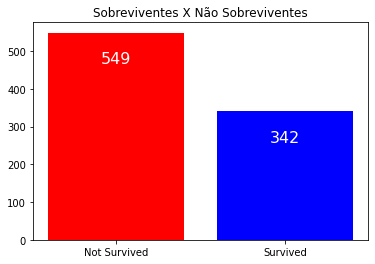

In [ ]:
frequencia_survived = treino_dataset.groupby('Survived')['Survived'].count()
plt.bar(x = frequencia_survived.index, height= frequencia_survived.values, color = ['r', 'b'])
plt.xticks([0,1], ['Not Survived', 'Survived'])
for i, value in enumerate(frequencia_survived.values):
    plt.text(i, value-70, str(value), fontsize=16, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.title('Sobreviventes X Não Sobreviventes')
plt.show()


In [ ]:
survived = treino_dataset.loc[treino_dataset['Survived'] == 1]
print(f'Número de sobreviventes: {survived["Survived"].count()}')

Número de sobreviventes: 342


## Variável Independente: 'Sex'

In [ ]:
man_survived = survived.loc[survived['Sex'] == 'male']
female_survived = survived.loc[survived['Sex'] == 'female']
print(f'Homens Sobreviventes: {len(man_survived)}')
print(f'Mulheres Sobreviventes: {len(female_survived)}')

Homens Sobreviventes: 109
Mulheres Sobreviventes: 233


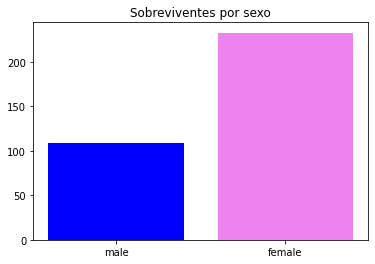

In [ ]:
plt.bar(['male', 'female'], [len(man_survived), len(female_survived)], color = ['blue', 'violet'])
plt.title('Sobreviventes por sexo')
plt.show()

O gráfico evidencia que as mulheres tem um número maior de sobreviventes. Podendo ser um fator significativo para a predição.

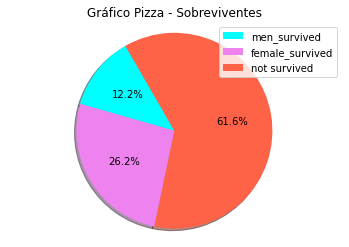

In [ ]:
# Dados para a plotagem
labels = 'men_survived', 'female_survived', 'not survived'
sizes = [len(man_survived), len(female_survived), len(treino_dataset) - len(female_survived) - len(man_survived)]
colors = ['cyan', 'violet', 'tomato']

# Plot
plt.pie(sizes, colors=colors,
autopct='%1.1f%%', shadow=True, startangle= 120)
plt.title('Gráfico Pizza - Sobreviventes')
plt.legend(labels, loc='upper right')
plt.axis('equal')
plt.show()

Do total de passageiros, apenas 12,2% dos homens e 26,2% das mulheres sobreviveram.

##Variável Independente: 'PClass'

In [ ]:
# Total de Passageiros por classe
pclass_passenger = treino_dataset.groupby('Pclass')['Pclass'].count()
pclass_passenger

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

A variável PClass apresenta 3 classes. A que possui a maior lotação é a terceira classe.

In [ ]:
# Sobreviventes por classe
pclass_survived = survived.groupby('Pclass')['Pclass'].count()
pclass_survived

Pclass
1    136
2     87
3    119
Name: Pclass, dtype: int64

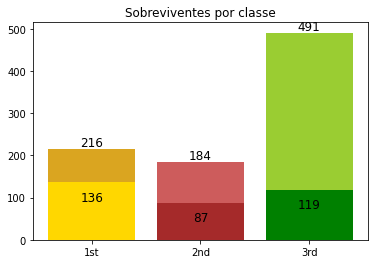

In [ ]:
plt.bar(x = pclass_passenger.index, height= pclass_passenger.values, color = ['goldenrod', 'indianred', 'yellowgreen'] )
for i, value in enumerate(pclass_passenger.values):
    plt.text(i + 1, value+15, str(value), fontsize=12, color='black',
             horizontalalignment='center', verticalalignment='center')
plt.bar(x = pclass_survived.index, height= pclass_survived.values, color = ['gold', 'brown', 'green'])
plt.xticks([1,2,3], ['1st', '2nd', '3rd'])
plt.title('Sobreviventes por classe')
for i, value in enumerate(pclass_survived.values):
    plt.text(i + 1, value - 35, str(value), fontsize=12, color='black',
             horizontalalignment='center', verticalalignment='center')
plt.show()

O gráfico de barras acima, tenta mostrar a quantidade de pessoas que estavam ocupando as classes (quantidade total no topo da barra) e a quantidade de pessoas que sobreviveram em cada classe (valor dentro da barra).
Fica claro que a primeira classe foi a que mais se salvou em número relativo. A terceira classe, embora tenha um número razoável de sobreviventes, é a que possui a maior concentração de passageiros.

In [ ]:
# Proporção de sobreviventes por classe
prop_pclass = pclass_survived / pclass_passenger
print('Taxa de Sobrevivência')
print(f'{prop_pclass}')


Taxa de Sobrevivência
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64


A taxa de sobreviventes é decrescente em relação as classes ocupadas.

In [ ]:
man_1st = treino_dataset.loc[treino_dataset['Sex'] == 'male']
man_1st = man_1st.loc[man_1st['Pclass'] == 1]
print(f'Homens na Primeira Classe: {len(man_1st)}')
print(f'Mulheres na Primeira Classe: {216 - len(man_1st)}')


Homens na Primeira Classe: 122
Mulheres na Primeira Classe: 94


In [ ]:
man_2st = treino_dataset.loc[treino_dataset['Sex'] == 'male']
man_2st = man_2st.loc[man_2st['Pclass'] == 2]
print(f'Homens na Segunda Classe: {len(man_2st)}')
print(f'Mulheres na Segunda Classe: {184 - len(man_2st)}')


Homens na Segunda Classe: 108
Mulheres na Segunda Classe: 76


In [ ]:
man_3st = treino_dataset.loc[treino_dataset['Sex'] == 'male']
man_3st = man_3st.loc[man_3st['Pclass'] == 3]
print(f'Homens na Terceira Classe: {len(man_3st)}')
print(f'Mulheres na Terceira Classe: {491 - len(man_3st)}')


Homens na Terceira Classe: 347
Mulheres na Terceira Classe: 144


In [ ]:
man_3st_rel = len(man_3st) / 491
man_3st_rel

0.7067209775967414

A #1 e #2 classes tem em sua composição mais homens do que mulheres, porém os números são - relativamente - próximos. A terceira classe é a que mais tem discrepância na distribuição (aproximadamente 71% da ocupação dessa classe é masculina).

In [ ]:
man_survived_1st = man_survived.loc[man_survived['Pclass'] == 1]
man_survived_2nd = man_survived.loc[man_survived['Pclass'] == 2]
man_survived_3rd = man_survived.loc[man_survived['Pclass'] == 3]
female_survived_1st = female_survived.loc[female_survived['Pclass'] == 1]
female_survived_2nd = female_survived.loc[female_survived['Pclass'] == 2]
female_survived_3rd = female_survived.loc[female_survived['Pclass'] == 3]
print(f'Homens Sobreviventes 1st: {len(man_survived_1st)}')
print(f'Mulheres Sobreviventes 1st: {len(female_survived_1st)}')
print()
print(f'Homens Sobreviventes 2nd: {len(man_survived_2nd)}')
print(f'Mulheres Sobreviventes 2nd: {len(female_survived_2nd)}')
print()
print(f'Homens Sobreviventes 3rd: {len(man_survived_3rd)}')
print(f'Mulheres Sobreviventes 3rd: {len(female_survived_3rd)}')

Homens Sobreviventes 1st: 45
Mulheres Sobreviventes 1st: 91

Homens Sobreviventes 2nd: 17
Mulheres Sobreviventes 2nd: 70

Homens Sobreviventes 3rd: 47
Mulheres Sobreviventes 3rd: 72


Em todas as classes as mulheres têm o maior índice de sobrevivência. Os homens da segunda e da terceira classe foram os que mais morreram.

##Variável Independente: 'Age'

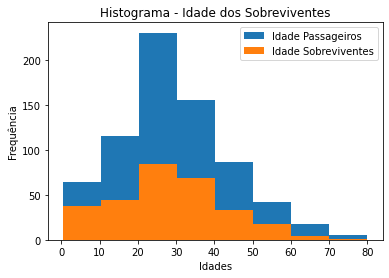

In [ ]:
plt.hist(treino_dataset['Age'], bins=8)
plt.hist(survived['Age'], bins=8)
plt.title('Histograma - Idade dos Sobreviventes')
plt.legend(['Idade Passageiros', 'Idade Sobreviventes'])
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.show()

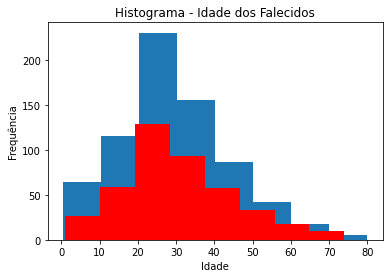

In [ ]:
not_survived = treino_dataset.loc[treino_dataset['Survived'] == 0]
plt.hist(treino_dataset['Age'], bins=8)
plt.hist(not_survived['Age'], bins=8, color='r')
plt.title('Histograma - Idade dos Falecidos')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Os histogramas evidenciam que a distribuição das idades para os sobreviventes e não sobreviventes são parecidas. A faixa etária entre 20 e 40 anos é a que mais possui passageiros e, consequentemente, a que mais apresenta sobreviventes e não sobreviventes.

##Variável Independente: 'Sibsp'

In [ ]:
# Distribuição de passageiros que possuiam parentes(sibling-spouses) a bordo.
sibsp_passengers = treino_dataset.groupby('SibSp')['SibSp'].count()
sibsp_passengers

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [ ]:
# Distribuição de sobreviventes que possuiam parentes(sibling-spouses) a bordo.
sibsp_survived = survived.groupby('SibSp')['SibSp'].count()
sibsp_survived

SibSp
0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [ ]:
# Distribuição de não sobreviventes que possuiam parentes(sibling-spouses) a bordo.
sibsp_not_survived = not_survived.groupby('SibSp')['SibSp'].count()
sibsp_not_survived

SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: SibSp, dtype: int64

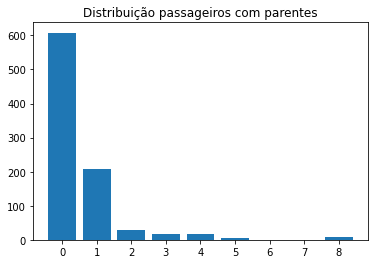

In [ ]:
plt.bar(x = sibsp_passengers.index, height= sibsp_passengers.values)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.title('Distribuição passageiros com parentes')
plt.show()

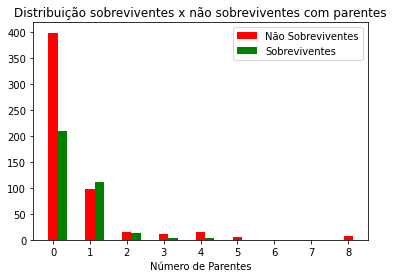

In [ ]:
plt.bar(x = sibsp_not_survived.index , height= sibsp_not_survived.values, width = 0.25, color='r')
plt.bar(x = sibsp_survived.index + 0.25, height= sibsp_survived.values, width = 0.25, color='g')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.title('Distribuição sobreviventes x não sobreviventes com parentes')
plt.xlabel('Número de Parentes')
plt.legend(['Não Sobreviventes', 'Sobreviventes'])
plt.show()

A grande maioria a bordo do Titanic não foi acompanhada por parentes. Sobreviveram apenas pessoas que estavam acompanhadas de no máximo 4 parentes.
* Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

In [ ]:
# Proporção de sobreviventes por quantidade de parentes
prop_sibsp = sibsp_survived / sibsp_passengers
print('Taxa de Sobrevivência por número de parentes')
print(f'{prop_sibsp}')

Taxa de Sobrevivência por número de parentes
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: SibSp, dtype: float64


Agrupando os passageiros por quantidade de parentes (sibling), observamos que a taxa de sobrevivência foi maior com passageiros com 1 parente, seguido por 2 parentes. Pessoas sozinhas obtiveram uma taxa de sobrevivência de aproximadamente 35%. 

##Variável Independente: 'Parch'

In [ ]:
# Distribuição de passageiros que possuiam parentes(parch) a bordo.
parch_passengers = treino_dataset.groupby('Parch')['Parch'].count()
parch_passengers

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

In [ ]:
# Distribuição de sobreviventes que possuiam parentes(parch) a bordo.
parch_survived = survived.groupby('Parch')['Parch'].count()
parch_survived

Parch
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [ ]:
# Distribuição de não sobreviventes que possuiam parentes(parch) a bordo.
parch_not_survived = not_survived.groupby('Parch')['Parch'].count()
parch_not_survived

Parch
0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: Parch, dtype: int64

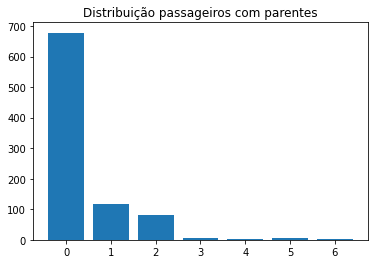

In [ ]:
plt.bar(x = parch_passengers.index, height= parch_passengers.values)
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.title('Distribuição passageiros com parentes')
plt.show()

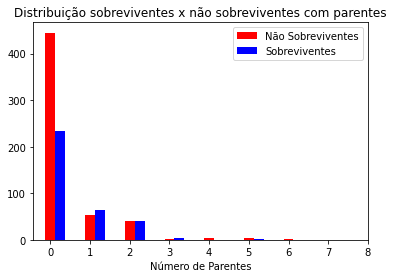

In [ ]:
plt.bar(x = parch_not_survived.index , height= parch_not_survived.values, width = 0.25, color='r')
plt.bar(x = parch_survived.index + 0.25, height= parch_survived.values, width = 0.25, color='b')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.title('Distribuição sobreviventes x não sobreviventes com parentes')
plt.xlabel('Número de Parentes')
plt.legend(['Não Sobreviventes', 'Sobreviventes'])
plt.show()

Assim como verificado com a variável Sibling, a grande maioria a bordo do Titanic não foi acompanhada por parentes. Sobreviveram apenas pessoas que estavam acompanhadas de no máximo 5 parentes. Maior sobrevivência em pessoas com 1, 2, ou 3 parentes.

* Parch = The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson. 
Some children travelled only with a nanny, therefore parch=0 for them.

##Variável Embarked

In [ ]:
# Distribuição de passageiros por Porto.
embarked_passengers = treino_dataset.groupby('Embarked')['Embarked'].count()
embarked_passengers

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

A maioria dos passageiros embarcaram em Southampton.

In [ ]:
# Distribuição de sobreviventes por Porto.
embarked_survivors = survived.groupby('Embarked')['Embarked'].count()
embarked_survivors

Embarked
C     93
Q     30
S    217
Name: Embarked, dtype: int64

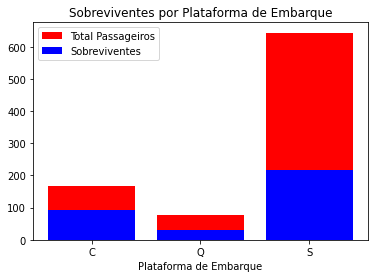

In [ ]:
plt.bar(x = embarked_passengers.index, height=embarked_passengers.values, color='r')
plt.bar(x = embarked_survivors.index, height=embarked_survivors.values, color='b')
plt.title('Sobreviventes por Plataforma de Embarque')
plt.xlabel('Plataforma de Embarque')
plt.legend(['Total Passageiros', 'Sobreviventes'], loc = 'best')
plt.show()

Passageiros das plataformas C e Q obtiveram uma taxa de sobrevivência melhor dos que embarcaram em S.

#Variável Fare

O dataset possui diversos valores para a Taxa de Embarcação, inclusive 0. Para esse valor, há a possibilidade de ser relacionado à tripulação. Temos 248 valores diferentes de fare.

In [ ]:
fare = treino_dataset.groupby('Fare')['Fare'].count()
fare

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

Fare provavelmente está interligado com a condição de Pclass e Cabin(?), pois quanto maior o poder aquisitivo, maior a propensão para a aquisição de classes e cabines melhores.

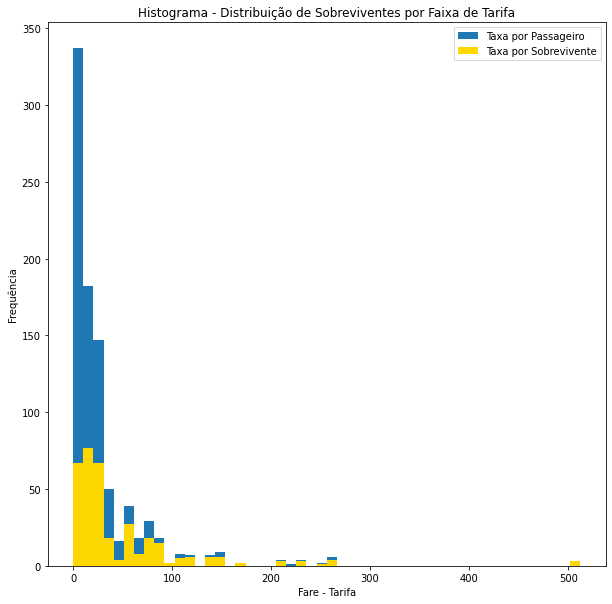

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(treino_dataset.Fare, bins = 50)
plt.hist(survived.Fare, bins= 50, color='gold')
plt.title('Histograma - Distribuição de Sobreviventes por Faixa de Tarifa')
plt.xlabel('Fare - Tarifa')
plt.ylabel('Frequência')
plt.legend(['Taxa por Passageiro', 'Taxa por Sobrevivente'])
plt.show()


# Pré Processamento de Dados

## Verificação de Missing Values

In [ ]:
treino_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Temos um total de 177 valores missing para Age, 687 para Cabin e 2 para Embarked para o dataset de treino.

In [ ]:
teste_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Temos um total de 86 valores missing para Age, 327 para Cabin no dataset de teste.

In [ ]:
id = teste_dataset.iloc[: , 0].values

# Tratamento para os valores Null

In [ ]:
treino_dataset['Age'].fillna((treino_dataset['Age'].median()), inplace=True)
treino_dataset['Embarked'].fillna('S', inplace=True)
teste_dataset['Age'].fillna((teste_dataset['Age'].median()), inplace=True)
# 1 Valor Nan para Fare teste
teste_dataset['Fare'].fillna((teste_dataset['Fare'].median()), inplace = True)

In [ ]:
# A variável Cabin possui 687 valores NaN, opção: exclusão da coluna
treino_dataset = treino_dataset.drop(labels=['Cabin'], axis=1)
teste_dataset = teste_dataset.drop(labels=['Cabin'], axis=1)

# Exclusão de Variáveis 

In [ ]:
# As variáveis PassengerId, Name e Ticket serão excluídas. Não trazem impactos significativos para o modelo.
treino_dataset = treino_dataset.drop(labels=['PassengerId', 'Name', 'Ticket'], axis=1)
teste_dataset = teste_dataset.drop(labels=['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
treino_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
teste_dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


##Labels para as variáveis categóricas

In [ ]:
treino_dataset.Sex = treino_dataset.Sex.replace('female', 0)
treino_dataset.Sex = treino_dataset.Sex.replace('male', 1)
treino_dataset.Embarked = treino_dataset.Embarked.replace('S', 0)
treino_dataset.Embarked = treino_dataset.Embarked.replace('C', 1)
treino_dataset.Embarked = treino_dataset.Embarked.replace('Q', 2)

teste_dataset.Sex = teste_dataset.Sex.replace('female', 0)
teste_dataset.Sex = teste_dataset.Sex.replace('male', 1)
teste_dataset.Embarked = teste_dataset.Embarked.replace('S', 0)
teste_dataset.Embarked = teste_dataset.Embarked.replace('C', 1)
teste_dataset.Embarked = teste_dataset.Embarked.replace('Q', 2)



In [ ]:
treino_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


In [ ]:
teste_dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0
414,1,0,39.0,0,0,108.9000,1
415,3,1,38.5,0,0,7.2500,0
416,3,1,27.0,0,0,8.0500,0


#Treino do Modelo - Algoritmo Decision Tree

## Separando a variável target das demais

In [ ]:
X = treino_dataset.iloc[: ,1:8].values
y = treino_dataset.iloc[: , 0].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

array([[ 3.    ,  1.    , 28.    , ...,  0.    ,  7.8958,  0.    ],
       [ 3.    ,  0.    , 17.    , ...,  2.    ,  7.925 ,  0.    ],
       [ 3.    ,  1.    , 30.    , ...,  0.    , 16.1   ,  0.    ],
       ...,
       [ 3.    ,  1.    , 28.    , ...,  0.    ,  7.7333,  2.    ],
       [ 3.    ,  0.    , 36.    , ...,  0.    , 17.4   ,  0.    ],
       [ 2.    ,  1.    , 60.    , ...,  1.    , 39.    ,  0.    ]])

In [ ]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
X_test

array([[  3.    ,   1.    ,  28.    , ...,   0.    ,  14.4583,   1.    ],
       [  3.    ,   1.    ,  28.    , ...,   0.    ,   7.55  ,   0.    ],
       [  3.    ,   1.    ,   7.    , ...,   1.    ,  29.125 ,   2.    ],
       ...,
       [  3.    ,   1.    ,  19.    , ...,   0.    ,   7.775 ,   0.    ],
       [  1.    ,   0.    ,  21.    , ...,   2.    , 262.375 ,   1.    ],
       [  3.    ,   0.    ,   4.    , ...,   1.    ,  16.7   ,   0.    ]])

In [ ]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 5:-1] = sc.fit_transform(X_train[:, 5:-1])
X_test[:, 5:-1]= sc.transform(X_test[:, 5:-1])

In [ ]:
print(X_train[0,:])

[ 3.          1.         28.          0.          0.         -0.48380773
  0.        ]


Treinando o modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1),
                      y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[115  24]
 [ 25  59]]


0.7802690582959642

#Predição

In [ ]:
X_pred = teste_dataset.iloc[:, :].values

In [ ]:
X_pred

array([[ 3.    ,  1.    , 34.5   , ...,  0.    ,  7.8292,  2.    ],
       [ 3.    ,  0.    , 47.    , ...,  0.    ,  7.    ,  0.    ],
       [ 2.    ,  1.    , 62.    , ...,  0.    ,  9.6875,  2.    ],
       ...,
       [ 3.    ,  1.    , 38.5   , ...,  0.    ,  7.25  ,  0.    ],
       [ 3.    ,  1.    , 27.    , ...,  0.    ,  8.05  ,  0.    ],
       [ 3.    ,  1.    , 27.    , ...,  1.    , 22.3583,  1.    ]])

In [ ]:
X_pred[:, 5:-1] = sc.transform(X_pred[:, 5:-1])

In [ ]:
survived = classifier.predict(X_pred)

In [ ]:
# Cria um DataFrame com os Ids dos passageiros e a predição.
submission = pd.DataFrame({'PassengerId':id,'Survived':survived})

#Visualização das 5 primeiras linhas
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [ ]:
submission.to_csv('Titanic_Predictions.csv', index=False)